## DATASETS & DATALOADERS
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. They can be used to prototype and benchmark your model. 

## Loading a Dataset.
Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

##### We load the FashionMNIST Dataset with the following parameters:
*    root is the path where the train/test data is stored,
*    train specifies training or test dataset,
*    download=True downloads the data from the internet if it’s not available at root.
*    transform and target_transform specify the feature and label transformations

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [23]:
training_data = datasets.FashionMNIST(
    root='data',
    train= True,
    download = True,
    transform= ToTensor()
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download= True,
    transform = ToTensor()

)

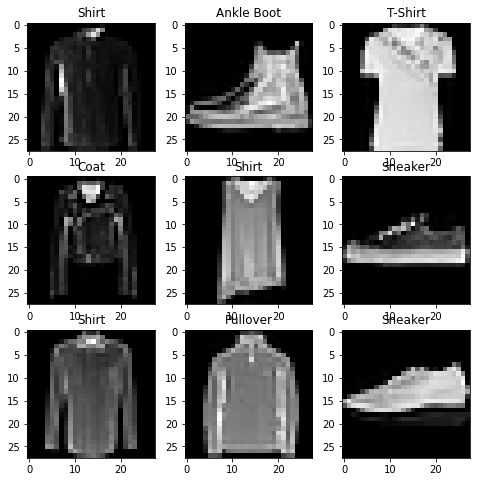

In [29]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data),size = (1,)).item()
    # print(sample_idx)
    img, label = training_data[sample_idx]
    figure.add_subplot(cols, rows, i)
    plt.title(labels_map[label])
    plt.axis("on")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [38]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(training_data, batch_size= 64, shuffle = True)
test_data_loader = DataLoader(test_data, batch_size= 64, shuffle= True)
train_features, train_labels = next(iter(train_data_loader))

Feature batch size : torch.Size([64, 1, 28, 28]) 
Label batch size: torch.Size([64])
Label: 6


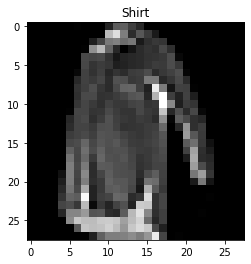

In [43]:
print(f"Feature batch size : {train_features.size()} ")
print(f"Label batch size: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
print(f"Label: {label}")
plt.title(labels_map[int(label)])
plt.imshow(img, cmap = 'gray')
plt.show()
